```{admonition} Information
__Section__: Contrast  
__Goal__: Understand how to gauge the contrast of an image from its grayscale histogram.  
__Time needed__: 20 min  
__Prerequisites__: Introduction about machine learning experiments, basics about image processing
```

# Contrast

## Gauge the contrast of an object on an image

First, let's have a look at the grayscale histogram. This histogram represents the distribution of gray values on a grayscale image. If the histogram contains more higher values, the image is mainly black, in the opposite case it is mainly white. So, a bright image will have a histogram located more to the right, while a picture containing a lot of shadows or dark areas will show a left-shifted histogram. A well-balanced image has values on the whole range of the histogram. A spike at one of the ends indicates the presence of pure black (left) or pure white (right).

The grayscale histogram is a good indicator of contrast: more values located to both ends of the graph indicates more "extreme" bright and dark values, so more contrast. On the contrary, a histogram showing a relatively constant slope on the whole range of values indicates a non-contrasted image.

A well-contrasted image should show better results in object detection and recognition, as it allows a better catch of the particular object that is studied.

Note that it makes sense to talk about contrast of an image containing an object, because the object helps gauging the contrast, as contrast is the difference of intensity between an object and its surroundings. However, it does not make too much sense to talk about the contrast of an image that does not contain an object of interest. In this course, we study object recognition, and that is why we talk about contrast.

```{toggle} Advanced level
First, we import an image and get its black and white version, with the function [rgb2gray()](https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2gray) from the ``skimage`` library:
```

In [1]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray

image = io.imread('./data/1.jpg')

image2 = rgb2gray(image)

The grayscale image is a simpler image and is stored only as an array of arrays, containing the lines of the image. No need for 3 channels as each pixel contains now only one value, the gray value.

In [2]:
image2

array([[0.23559176, 0.23951333, 0.24735647, ..., 0.08375961, 0.08375961,
        0.08375961],
       [0.23951333, 0.2434349 , 0.24735647, ..., 0.08768118, 0.08768118,
        0.08768118],
       [0.2434349 , 0.24735647, 0.25127804, ..., 0.09552431, 0.09552431,
        0.09552431],
       ...,
       [0.4076102 , 0.41153176, 0.41545333, ..., 0.66691686, 0.66664902,
        0.65488431],
       [0.39976706, 0.40368863, 0.40368863, ..., 0.66691686, 0.67057059,
        0.66693176],
       [0.40368863, 0.39976706, 0.39976706, ..., 0.66299529, 0.67449216,
        0.67869647]])

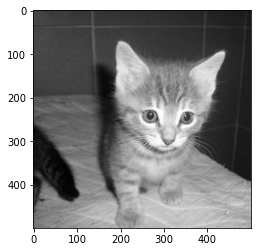

In [3]:
plt.imshow(image2, cmap = 'gray') # the parameter 'cmap' is necessary for the method to understand that we do not have
                                  # 3-color channels anymore but only 1 gray value for each pixel

```{toggle} Advanced level
Then we can plot the grayscale histogram with the method [hist()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) from the ``matplotlib`` library. We pass as a parameter the grayscale image, to which we add the method ``flatten()`` which transforms a list of lists into a simple list. Here, we do not need to keep the structure "in lines" of the image and can only take all the gray values to build a histogram.
```

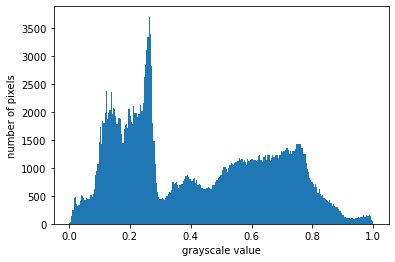

In [4]:
plt.figure()
plt.xlabel('grayscale value')
plt.ylabel('number of pixels')

plt.hist(image2.flatten(), bins = 256, range = (0, 1))
plt.show()

This histogram shows relatively well distributed gray values, but we can see a small part between 0.3 and 0.5 with less pixels, indicating a relatively contrasted image.

Have a look at the histograms for other images by changing the name of the picture ``1.jpg`` by any integer in the range ``[1, 20]``.

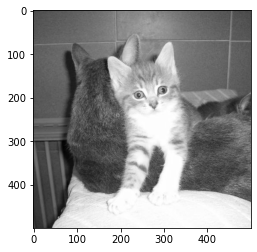

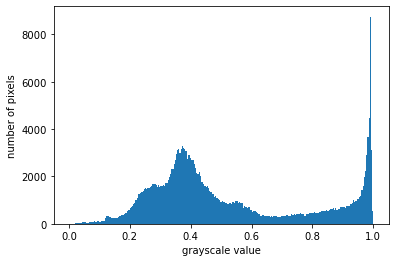

In [5]:
image = rgb2gray(io.imread('./data/2.jpg'))
plt.imshow(image, cmap = 'gray')
plt.figure()
plt.xlabel('grayscale value')
plt.ylabel('number of pixels')
plt.hist(image.flatten(), bins = 256, range = (0, 1))
plt.show()

In [6]:
# For beginner version: cell to hide

import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def plot_hist(image_nb):
    image = rgb2gray(io.imread('./data/' + str(image_nb) + '.jpg'))
    plt.imshow(image, cmap = 'gray')
    plt.figure()
    plt.xlabel('grayscale value')
    plt.ylabel('number of pixels')
    plt.hist(image.flatten(), bins = 256, range = (0, 1))
    plt.show()

    
interact(plot_hist,
         image_nb = widgets.IntText(value = 1,
                                    description = 'Image:',
                                    disabled = False))

interactive(children=(IntText(value=1, description='Image:'), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_hist(image_nb)>

## Change the contrast

Of course, some techniques exist to change the contrast of an image.

Below, we present one of them. The parameter ``in_range`` is used to define the boundaries of the values, therefore changing the contrast. By putting a short range (the difference between the two boundaries is small, for example, 0.3 and 0.5 gives a difference of 0.2, compared to the difference of the boundaries in a classic histogram being of 1), we increase the contrast of the object on the image because the histogram will gather the values closer to the boundaries. Then, if the range we define is closer to 0, the image will be brighter, if it is closer to 1, the image will be darker.

This will be easier to understand when playing with the parameter:

```{toggle} Advanced level
In Python, we can use the function [rescale_intensity](https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.rescale_intensity) of the library ``skimage``. The parameter ``in_range`` is used as a tuple to determine the boundaries of the new image. Change the values of the parameter ``in_range`` to play around with contrast.

Change the image to try with other images.
```

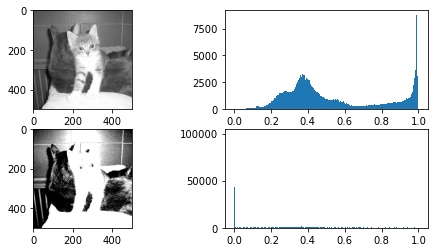

In [26]:
from skimage.exposure import rescale_intensity

image = rgb2gray(io.imread('./data/2.jpg'))
    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (8, 4))
    
ax1.imshow(image, cmap = 'gray')
ax2.hist(image.flatten(), bins = 256, range = (0, 1))
    
# Change the value of in_range
im2 = rescale_intensity(image, in_range = (0.3, 0.5))
    
ax3.imshow(im2, cmap = 'gray')
ax4.hist(im2.flatten(), bins = 256, range = (0, 1))
    
plt.show()

In [29]:
# For beginner version: cell to hide

import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def plot_images(image_nb, in_range1, in_range2):
    
    image = rgb2gray(io.imread('./data/' + str(image_nb) + '.jpg'))
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (8, 4))
    
    ax1.imshow(image, cmap = 'gray')
    ax2.hist(image.flatten(), bins = 256, range = (0, 1))
    
    im2 = rescale_intensity(image, in_range = (in_range1, in_range2))
    
    ax3.imshow(im2, cmap = 'gray')
    ax4.hist(im2.flatten(), bins = 256, range = (0, 1))
    
    plt.show()

    
interact(plot_images,
         image_nb = widgets.IntText(value = 2,
                                    description = 'Image:',
                                    disabled = False),
         in_range1 = widgets.BoundedFloatText(value = 0.3,
                                              min = 0,
                                              max = 1,
                                              step = 0.1,
                                              description = 'in_range:',
                                              disabled=False),
         in_range2 = widgets.BoundedFloatText(value = 0.7,
                                              min = 0,
                                              max = 1,
                                              step = 0.1,
                                              description = ',',
                                              disabled=False)
         )

interactive(children=(IntText(value=2, description='Image:'), BoundedFloatText(value=0.3, description='in_rang…

<function __main__.plot_images(image_nb, in_range1, in_range2)>

## Quiz

In [37]:
from IPython.display import IFrame
IFrame("https://blog.hoou.de/wp-admin/admin-ajax.php?action=h5p_embed&id=68", "959", "340")